# Predicting water pumps faults in Tanzania

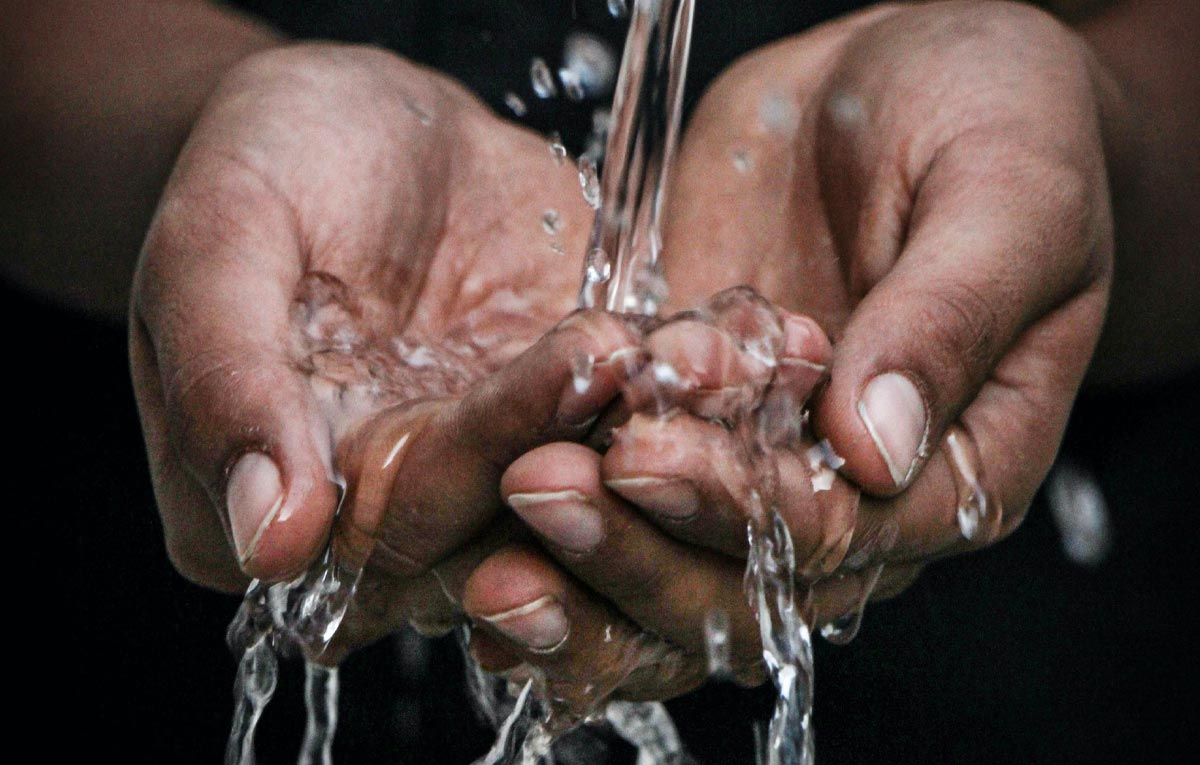


# Business Understanding

Ensuring access to clean and reliable water sources is critical for public health, economic development, and communities’ overall well-being. However, in Tanzania, access to clean and reliable water remains a major social economic challenge. According to World Bank report on universal access to water and sanitation of 2023, 39% (24million) of the population in the country suffers from acute water shortage throughout the year.  This leads to water related preventable deaths and diseases that cost the economy of Tanzania more than $2.4 billion each year in excess medical costs and lost productivity. These are resources that could have been channeled towards much needed development. It is estimated that provision of adequate water through optimizing current water supply will significantly reduce economic losses and generate savings that would facilitate more spending towards development.

## Business problem
Tanzania water supply system is characterized by frequent water pumps breakdown resulting from lack of proper maintenance and inefficient management. This leads to disruptions in water supply which exacerbate the acute shortage to clean water and subsequent social economic losses.
 
The government of Tanzania, in collaboration with NGOs and partner organization aim to enhance access to clean water by improving the maintenance and functionality of water wells across the country. However, with limited resources, it's crucial to prioritize repairs and interventions on the wells most in need. To achieve this, water point sustainability risk levels across supply system need to be projected by learning from current point profiles to guide stakeholders’ decisions through highlighting;

- Most dilapidated wells that should be prioritized for maintenance, repairs or rehabilitation.
- Sites to be earmarked for future wells.
- Data driven recommendations that are responsive to stakeholders needs and actionable guide improve management practices and water accessibility

## Stakeholders

- Government of Tanzania: Interested in optimizing resources for maintaining and repairing water wells to ensure clean water access for citizens.
- NGOs focusing on clean water access: Seeking to identify and prioritize wells in need of repair to efficiently allocate resources and interventions.
- Private sector partners: Potentially interested in investing in water infrastructure projects aligned with corporate social responsibility initiatives or in collaboration with NGOs and governmental organizations.


## Objective
The objective of this project is to predict the operational/functionality status of water pumps based on various features related to the pumps' installation. Specifically, the project will:
- To evaluate factors that affect functionality of a pump.
- Identify and model combinations of features is best predicting functionality of a water pump.
- Test and validate the accuracy of the model.
- Draw conclusion and recommendations

## Data Understanding


The dataset for this project was obtained from  www.drivendata.org titled “Pump it Up: Data Mining the Water Table” of 2015. It is divided into three csv files. The main dataset is split intro training set containing 59,400 observations translating to 80% and test set containing 14,850 observations (20%). The third dataset contains training set labels that detail status group information for each of the training set values indicating whether the pump is “functional”, “non-functional”, or, “in need of repairs”. Both the train and test dataset have 40 similar columns with information about water pumps in Tanzania, including various attributes such as pump location, construction details, management, payment details, and water quality. 
Key columns include:
- id: Unique identifier for each water pump
- amount_tsh: Total static head (amount of water available to pump)
- date_recorded: Date the pump data was recorded
- funder: Organization or individual that funded the pump installation
- gps_height: Altitude of the pump location
- installer: Organization or individual that installed the pump
- longitude: Geographic longitude coordinate of the pump location
- latitude: Geographic latitude coordinate of the pump location
- wpt_name: Name of the waterpoint (e.g., name of the well)
- num_private: Number of private plots reserved to waterpoint
- population: Population catchment served by the well
- construction_year: Year the pump was installed
- basin: Geographic basin of the pump location
- subvillage: Geographic location of the well within the village
- region: Geographic region of the pump location
- region_code: Code representing the geographic region
- district_code: Numeric code for the administrative district
- lga: Local Government Area
- ward: Administrative division within a district
- public_meeting: Indicator of whether there was a public meeting about the well
- recorded_by: Name of the person who entered the well into the database
- scheme_management: Management of the water scheme (e.g., water board)
- scheme_name: Name of the water scheme
- permit: Indicator of whether the waterpoint is permitted
- extraction_type: Method used to extract water from the well
- extraction_type_group: Grouped extraction type
- extraction_type_class: Class of extraction type
- management: Type of management for the pump
- management_group: Grouped management type
- payment: Payment type for water service
- payment_type: Type of payment
- water_quality: Quality of water provided by the pump
- quality_group: Grouped quality of water
- quantity: Quantity of water available
- quantity_group: Grouped quantity of water
- source: Water source
- source_type: Type of water source
- source_class: Class of water source
- waterpoint_type: Type of waterpoint
- status_group: Operational status of the water pump 

## Classification Task

Build a classifier to predict the condition of water wells in Tanzania. The condition can be categorized into different classes such as functional, in need of repair, or non-functional. This is a ternary classification problem by default, but it can be simplified into a binary classification problem by grouping "functional" and "in need of repair" as one class, and "non-functional" as the other.

In [1]:
import pandas as pd

# Importing the csv files
training = pd.read_csv("training.csv")
testing = pd.read_csv("testing.csv")
labels = pd.read_csv("labels.csv")

In [6]:
training.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [7]:
testing.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [8]:
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
